### Import packages for model development

In [45]:
# import libraries for data balancing
import imblearn.combine as c_sampling
import imblearn.over_sampling as o_sampling
import imblearn.pipeline as pl
import imblearn.under_sampling as u_sampling

# import libraries for data manipulation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

#import libraries for model training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

### Import credit card dataset

In [2]:
df = pd.read_csv('../../datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = df.drop(columns='Class')
y = df['Class']

In [4]:
def add_data_labels_bar(x,y, pos):
    y_total = y.sum()
    for i in range(len(x)):
        plt.text(i, y[i] + pos, f'{y[i]:,} ({round((y[i] * 100)/ y_total, 1)}%)', ha = 'center')

In [39]:
def plot_y_dist(y, technique, pos=2000):
    g = y.value_counts()
    plt.figure(figsize=[12, 8])
    plt.bar(g.index, g.values)
    add_data_labels_bar(g.index, g.values, pos)
    plt.xticks([0, 1], labels=['Non-fraudulent', 'Fraudulent'])
    plt.xlabel('Credit Card Transactions')
    plt.title(f'Frequency Distribution of Transactions ({technique})');

In [35]:
def evaluate_sampler(method):
    # define pipeline
    steps = [method, ('model', DecisionTreeClassifier(random_state= 1))]
    pipeline = pl.Pipeline(steps= steps)
    # define evaluation procedure
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
    # summarize performance
    print('Mean F1 score: %.3f' % np.mean(scores))

### Train baseline model

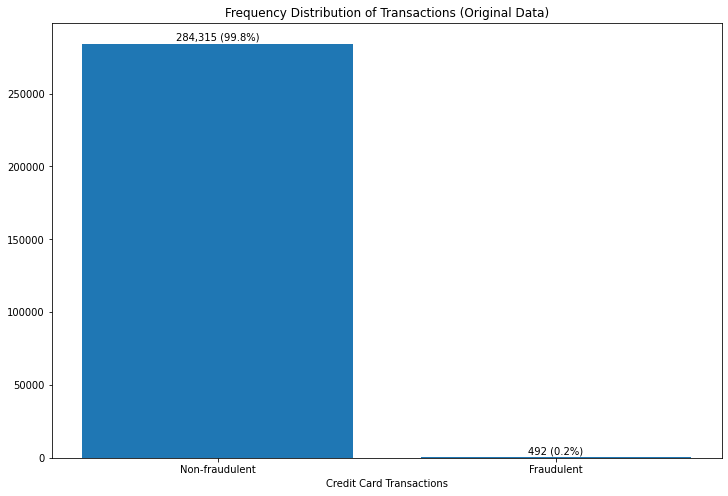

In [6]:
plot_y_dist(y, 'Original Data')

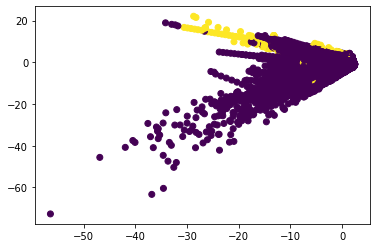

In [21]:
plt.scatter(X['V1'], X['V2'], c=y);

In [34]:
# define model
model = DecisionTreeClassifier(random_state= 1)
# define evaluation procedure
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1 score: %.3f' % np.mean(scores))

Mean ROC AUC: 0.878


### Balancing Techniques


#### Oversampling


##### SMOTE

In [8]:
over_s1 = o_sampling.SMOTE()
X_sam1, y_sam1 = over_s1.fit_resample(X, y)

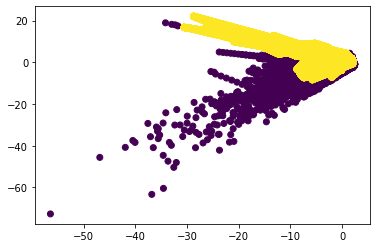

In [22]:
plt.scatter(X_sam1['V1'], X_sam1['V2'], c=y_sam1);

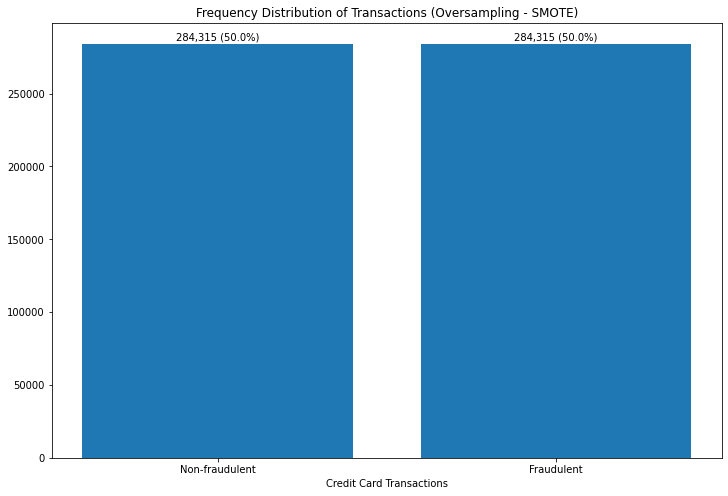

In [9]:
plot_y_dist(y_sam1, 'Oversampling - SMOTE')

In [14]:
evaluate_sampler(('os1', over_s1))

Mean ROC AUC: 0.897


##### Random Oversampling

In [15]:
over_s2 = o_sampling.RandomOverSampler(sampling_strategy= 'minority')
X_sam2, y_sam2 = over_s2.fit_resample(X, y)

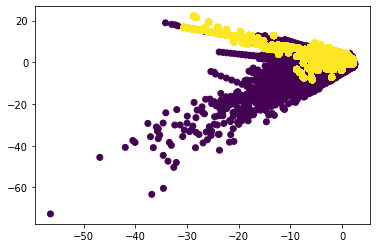

In [23]:
plt.scatter(X_sam2['V1'], X_sam2['V2'], c=y_sam2);

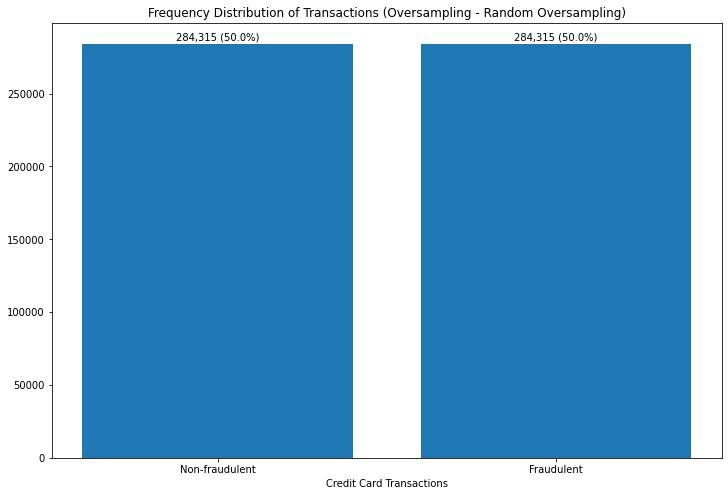

In [16]:
plot_y_dist(y_sam2, 'Oversampling - Random Oversampling')

In [17]:
evaluate_sampler(('os2', over_s2))

Mean ROC AUC: 0.866


#### Borderline SMOTE

In [24]:
over_s3 = o_sampling.BorderlineSMOTE()
X_sam3, y_sam3 = over_s3.fit_resample(X, y)

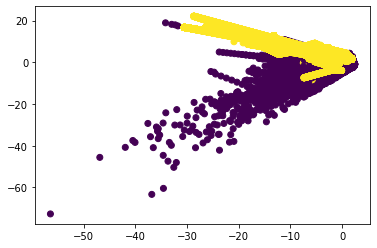

In [26]:
plt.scatter(X_sam3['V1'], X_sam3['V2'], c=y_sam3);

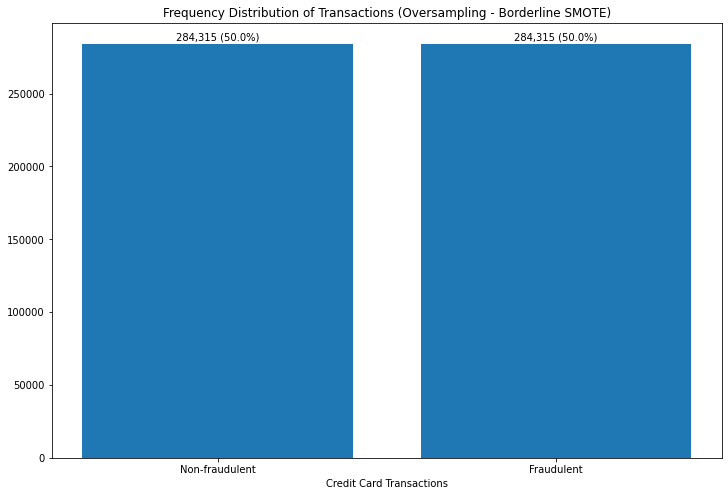

In [25]:
plot_y_dist(y_sam1, 'Oversampling - Borderline SMOTE')

In [ ]:
evaluate_sampler(('os3', over_s3))

#### SVM SMOTE

In [27]:
over_s4 = o_sampling.SVMSMOTE()
X_sam4, y_sam4 = over_s4.fit_resample(X, y)

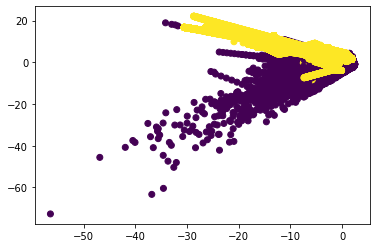

In [28]:
plt.scatter(X_sam4['V1'], X_sam4['V2'], c=y_sam4);

In [29]:
evaluate_sampler(('os4', over_s4))

Mean ROC AUC: 0.883


#### ADASYN

In [30]:
over_s5 = o_sampling.ADASYN()
X_sam5, y_sam5 = over_s5.fit_resample(X, y)

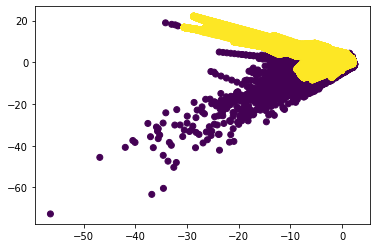

In [31]:
plt.scatter(X_sam5['V1'], X_sam5['V2'], c=y_sam5);

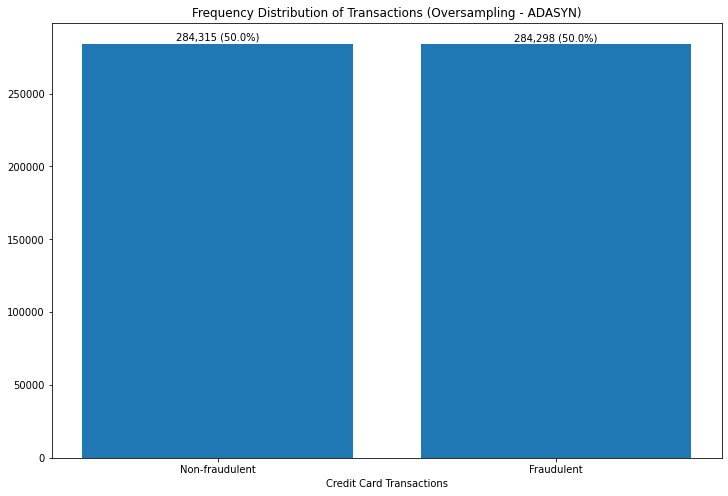

In [32]:
plot_y_dist(y_sam5, 'Oversampling - ADASYN')

In [33]:
evaluate_sampler(('os5', over_s5))

Mean ROC AUC: 0.897


#### Undersampling

##### CNN

In [10]:
under_s1 = u_sampling.CondensedNearestNeighbour(n_neighbors=1)
X_sam6, y_sam6 = under_s1.fit_resample(X, y)

KeyboardInterrupt: 

In [ ]:
plot_y_dist(y_sam6, 'Undersampling - CNN')

In [ ]:
evaluate_sampler(('us1', under_s1))

##### Random Undersampling

In [38]:
under_s2 = u_sampling.RandomUnderSampler(sampling_strategy=0.5)
X_sam7, y_sam7 = under_s2.fit_resample(X, y)

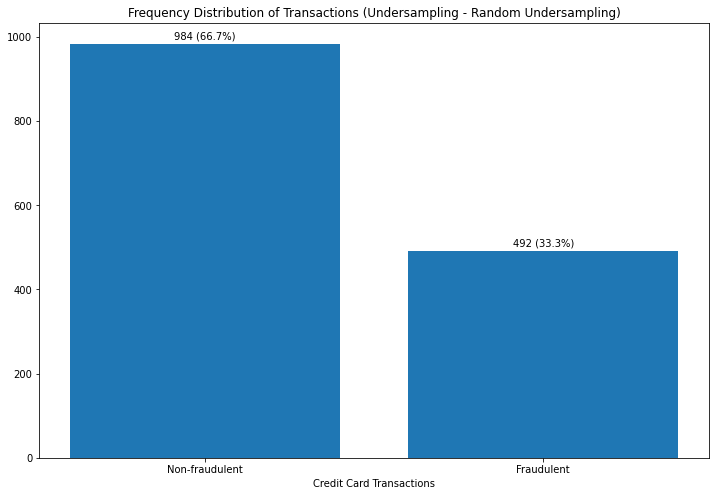

In [43]:
plot_y_dist(y_sam7, 'Undersampling - Random Undersampling', 10)

In [46]:
evaluate_sampler(('us2', under_s2))

Mean F1 score: 0.510


##### Near Miss

In [47]:
under_s3 = u_sampling.NearMiss(version=3, n_neighbors_ver3=3)
X_sam8, y_sam8 = under_s3.fit_resample(X, y)

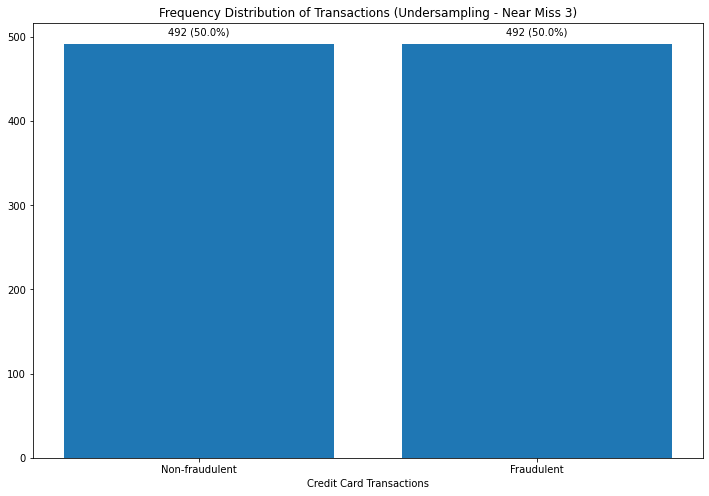

In [49]:
plot_y_dist(y_sam8, 'Undersampling - Near Miss 3', 10)

In [50]:
evaluate_sampler(('us3', under_s3))

Mean F1 score: 0.483


##### Tomek Links

In [51]:
under_s4 = u_sampling.TomekLinks()
X_sam9, y_sam9 = under_s4.fit_resample(X, y)

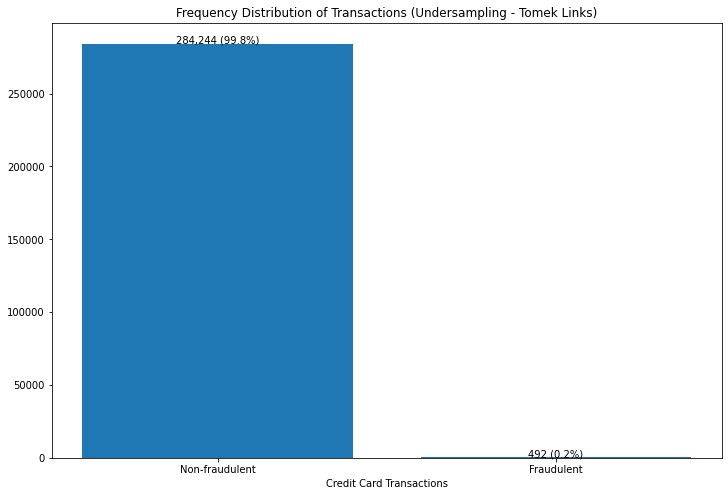

In [52]:
plot_y_dist(y_sam9, 'Undersampling - Tomek Links')

In [53]:
evaluate_sampler(('us4', under_s4))

Mean F1 score: 0.873


##### Edited Nearest Neighbours

In [54]:
under_s5 = u_sampling.EditedNearestNeighbours(n_neighbors=3)
X_sam10, y_sam10 = under_s5.fit_resample(X, y)

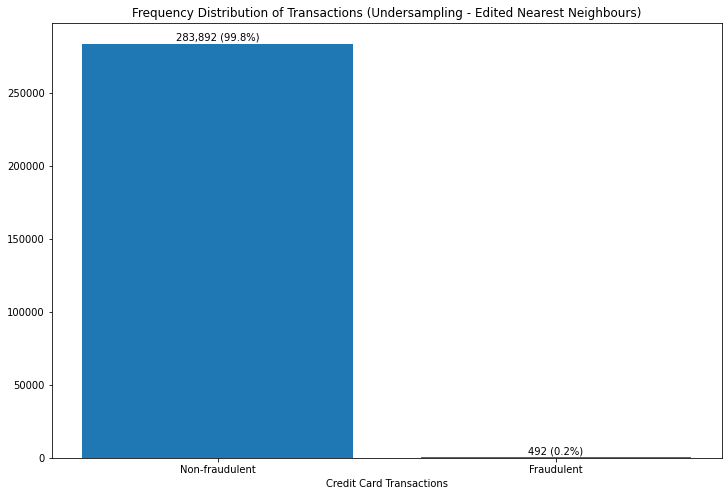

In [57]:
plot_y_dist(y_sam10, 'Undersampling - Edited Nearest Neighbours')

In [56]:
evaluate_sampler(('us5', under_s5))

Mean F1 score: 0.870


##### One Sided Selection

In [58]:
under_s6 = u_sampling.OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X_sam11, y_sam11 = under_s6.fit_resample(X, y)

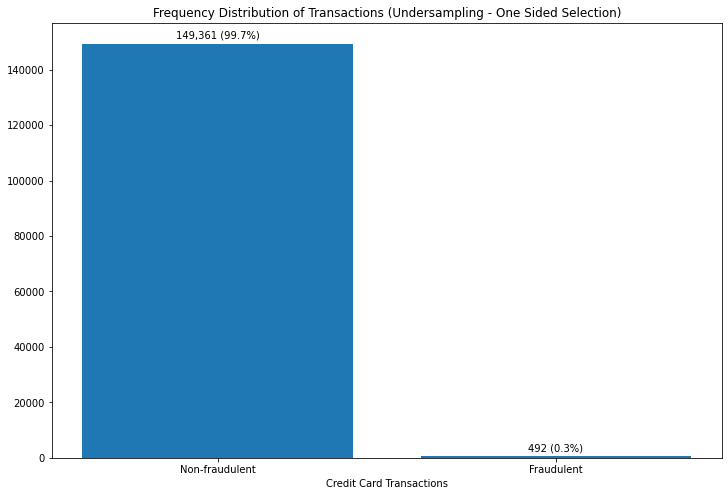

In [59]:
plot_y_dist(y_sam11, 'Undersampling - One Sided Selection')

In [60]:
evaluate_sampler(('us6', under_s6))

Mean F1 score: 0.844


##### Neighbourhood Cleaning Rule

In [61]:
under_s7 = u_sampling.NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_sam12, y_sam12 = under_s7.fit_resample(X, y)

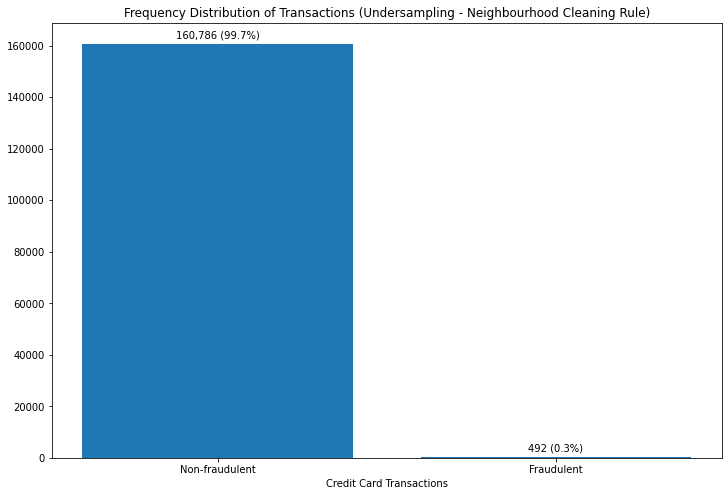

In [62]:
plot_y_dist(y_sam12, 'Undersampling - Neighbourhood Cleaning Rule')

In [63]:
evaluate_sampler(('us7', under_s7))

Mean F1 score: 0.858


#### Combined Sampling

##### SMOTE & Tomek Links

In [64]:
combined_s1 = c_sampling.SMOTETomek(tomek=u_sampling.TomekLinks(sampling_strategy='majority'))
X_sam13, y_sam13 = combined_s1.fit_resample(X, y)

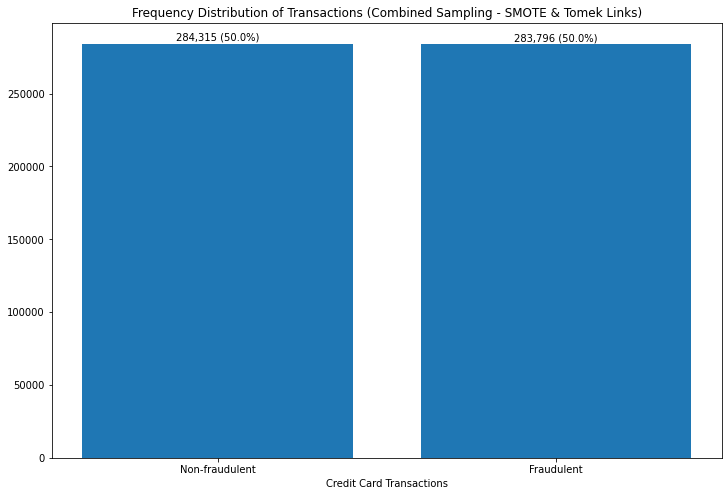

In [65]:
plot_y_dist(y_sam13, 'Combined Sampling - SMOTE & Tomek Links')

In [66]:
evaluate_sampler(('cs1', combined_s1))

##### SMOTE & ENN

In [ ]:
combined_s2 = c_sampling.SMOTEENN(enn=u_sampling.EditedNearestNeighbours(sampling_strategy='majority'))
X_sam14, y_sam14 = combined_s2.fit_resample(X, y)

In [ ]:
plot_y_dist(y_sam14, 'Combined Sampling - SMOTE & ENN')

In [ ]:
evaluate_sampler(('cs2', combined_s2))

##### ADASYN & ENN

In [ ]:
sampler_1 = o_sampling.ADASYN()
sampler_2 = u_sampling.EditedNearestNeighbours(n_neighbors=3)
X_step1, y_step1 = sampler_1.fit_resample(X, y)
X_sam15, y_sam15 = sampler_2.fit_resample(X_step1, y_step1)

In [ ]:
plot_y_dist(y_sam15, 'Combined Sampling - ADASYN & ENN')

In [ ]:
# define pipeline
steps = [('over', o_sampling.ADASYN()), ('under', u_sampling.EditedNearestNeighbours(n_neighbors=3)), ('model', DecisionTreeClassifier(random_state= 1))]
pipeline = pl.Pipeline(steps= steps)
# define evaluation procedure
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=cv, n_jobs=-1)
# summarize performance
print('Mean F1 score: %.3f' % np.mean(scores))